### About this Dataset
#### Context

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.   The data was scraped from www.sports-reference.com in May 2018 by https://www.kaggle.com/mohamedarshath. 

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

#### Content

a) athlete_events.csv -  contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

**ID** - Unique number for each athlete

**Name** - Athlete's name

**Sex** - M or F

**Age** - Integer

**Height** - In centimeters

**Weight** - In kilograms

**Team** - Team name

**NOC** - National Olympic Committee 3-letter code

**Games** - Year and season

**Year** - Integer

**Season** - Summer or Winter

**City** - Host city

**Sport** - Sport

**Event** - Event

**Medal** - Gold, Silver, Bronze, or NA

b) noc_regions.csv
**NOC** - National Olympic Committees (NOC). Abbreviations that mostly represent individual countries but  some comprise of many other smaller regions.

**region** - region/country name in full.

**notes** - Guiding  notes on the regions  affiliation.

c) Tokyo Medals 2021.csv

**Country** - Country name 

**Gold Medal** - Number of  gold medals per country(integer)

**Silver Medal**- Number of  silver medals per country(integer)

**Bronze Medal** - Number of  bronze medals per country(integer)

**Rank By Total** - Total number of medals per country(integer)

### Acknowledgements
The Olympic data on www.sports-reference.com is the result of an incredible amount of research by a group of Olympic history enthusiasts and self-proclaimed 'statistorians'. Check out their blog for more information. A

### Objective: 

To visualize  how Olympics has evolved over time with special emphasis  on African countries  that began participating quite  many years  after the  competitions  began. This is achieved by merging and  visualizing  output from the above datasets. 


In [1]:
import pandas as pd 
import numpy as np 
import math
import glob
import os

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px


import seaborn as sns
import bar_chart_race as bcr


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\wanda\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Datasets

In [7]:
df_events = pd.read_csv('https://github.com/rgriff23/Olympic_history/blob/master/data/athlete_events.csv') #1896 to 2016 dataset
df_noc_regions =  pd.read_csv("noc_regions.csv") #NOC region related information 
df_tokyo = pd.read_csv('Tokyo Medals 2021.csv') #Tokyo 2020 Dataset

In [8]:
df_events.head()

ID                      Name Sex   Age  Height  Weight            Team  NOC        Games  Year  Season       City          Sport                             Event Medal
0  1   A Dijiang                 M   24.0  180.0   80.0    China           CHN  1992 Summer  1992  Summer  Barcelona  Basketball     Basketball Men's Basketball       NaN 
1  2   A Lamusi                  M   23.0  170.0   60.0    China           CHN  2012 Summer  2012  Summer  London     Judo           Judo Men's Extra-Lightweight      NaN 
2  3   Gunnar Nielsen Aaby       M   24.0 NaN     NaN      Denmark         DEN  1920 Summer  1920  Summer  Antwerpen  Football       Football Men's Football           NaN 
3  4   Edgar Lindenau Aabye      M   34.0 NaN     NaN      Denmark/Sweden  DEN  1900 Summer  1900  Summer  Paris      Tug-Of-War     Tug-Of-War Men's Tug-Of-War       Gold
4  5   Christine Jacoba Aaftink  F   21.0  185.0   82.0    Netherlands     NED  1988 Winter  1988  Winter  Calgary    Speed Skating  Speed Skating Women's 500 metres  NaN

In [9]:
df_noc_regions.head()

NOC       region                 notes
0  AFG  Afghanistan  NaN                 
1  AHO  Curacao      Netherlands Antilles
2  ALB  Albania      NaN                 
3  ALG  Algeria      NaN                 
4  AND  Andorra      NaN

In [10]:
df_tokyo.head()

Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total
0  United States of America    39          41            33            113    1            
1  People's Republic of China  38          32            18            88     2            
2  Japan                       27          14            17            58     5            
3  Great Britain               22          21            22            65     4            
4  ROC                         20          28            23            71     3

#### A little bit of clean up

In [11]:
#Strip off extra spaces before and after teams
df_events["Team"] = df_events["Team"].str.strip()
df_events["NOC"] = df_events["NOC"].str.strip()
df_noc_regions["NOC"] = df_noc_regions["NOC"].str.strip()

In [12]:
df_noc_regions.head()

NOC       region                 notes
0  AFG  Afghanistan  NaN                 
1  AHO  Curacao      Netherlands Antilles
2  ALB  Albania      NaN                 
3  ALG  Algeria      NaN                 
4  AND  Andorra      NaN

In [13]:
#Summer olympics selection. These are events that most countries participated in 
df_events = df_events[df_events["Season"] == "Summer"] 

In [14]:
df_events.isnull().sum() #Sum of nulls 

ID        0     
Name      0     
Sex       0     
Age       9189  
Height    51857 
Weight    53854 
Team      0     
NOC       0     
Games     0     
Year      0     
Season    0     
City      0     
Sport     0     
Event     0     
Medal     188464
dtype: int64

Several null values in medals, height, weight and age. 

### Merge events and  NOC regions

In [15]:
df_events_final = df_events.merge(df_noc_regions,how="left",left_on="NOC",right_on="NOC")

In [16]:
df_events_final.isnull().sum()

ID        0     
Name      0     
Sex       0     
Age       9189  
Height    51857 
Weight    53854 
Team      0     
NOC       0     
Games     0     
Year      0     
Season    0     
City      0     
Sport     0     
Event     0     
Medal     188464
region    370   
notes     218151
dtype: int64

In [17]:
df_events_final['Medal'].fillna('DidNotWin', inplace = True) #Fill with "DidNotWin" where  the  medal row  is Null 
df_events_final = df_events_final.drop_duplicates() #Drop duplicates 

In [18]:
df_events_final.head()

ID                                Name Sex   Age  Height  Weight            Team  NOC        Games  Year  Season         City       Sport                         Event      Medal       region notes
0  1   A Dijiang                           M   24.0  180.0   80.0    China           CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China        NaN 
1  2   A Lamusi                            M   23.0  170.0   60.0    China           CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China        NaN 
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      Denmark         DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark      NaN 
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      Denmark/Sweden  DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark      NaN 
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      Netherlands     NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands  NaN

***Now, We are going to find why there are 1184 teams with 230 NOC regions.***
### A few examples:

In [19]:
df_events_final.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head(10)

FRA    160
USA    97 
GBR    96 
SWE    52 
NOR    46 
GER    43 
ITA    35 
CAN    31 
DEN    29 
GRE    29 
Name: NOC, dtype: int64

In [21]:
df_events_final.loc[df_events_final['NOC']=='SWE']['Team'].unique() #Regions  associated  with Sweden 

array(['Sweden', 'Gteborgs Roddklubb-1', 'Bissbi', 'Tornado', 'Elsie',
       'Ali-Baba II', 'May Be VII', 'Sweden-1', 'Sweden-2', 'Sweden-3',
       'Swedish Star', 'Kerstin-1', 'Kullan', 'Erna Signe', 'Slaghoken',
       'Slaghoken II', 'Marga-2', 'Gteborgs Roddfrening-2', 'Briar',
       'Roddklubben af 1912-1', 'Roddklubben af 1912-2', 'Lotta IV',
       'Saga-2', 'Mari', 'Galejan', 'May Be', 'Kitty-1',
       'Vaxholm Roddklubb', 'Ilderim', 'K.S.S.S. 1912-2', 'Freja',
       'Sass-2', 'Sylvia', 'Ingegerd', 'Sweden-4', 'Chance', 'Vinga-1',
       'Aloha II', 'Sans Atout-1', 'Kuling', 'Sif', 'Hayama', 'Rush VII',
       'Rush V', 'Floresco', 'Sunshine', 'Denmark/Sweden', 'Hojwa',
       'Humbug V', 'Lasha', 'Sjovinge', 'Solos Carex'], dtype=object)

In [22]:
df_events_final.loc[df_events_final['NOC']=='USA']['Team'].unique() #Regions  associated  with USA 

array(['United States', 'Vesper Boat Club', 'New York Athletic Club #2-4',
       'Mystery', 'Mound City Rowing Club-2',
       'La Salle Turnverein, Chicago', 'Gallant', 'United States-1',
       'United States-2', "Christian Brothers' College-1",
       'Passaic Turnverein, Passaic', 'Bingo',
       'Chicago Athletic Association-2', 'Widgeon',
       'Davenport Turngemeinde, Davenport',
       'Norwegier Turnverein, Brooklyn', 'Turnverein Vorwrts, Cleveland',
       'New York Turnverein, New York', 'Angelita', 'United States-10',
       'St. Rose-2', 'New York Athletic Club-1',
       'St. Louis Southwest Turnverein #1-2', 'Chicago Archers',
       'Rush IV', 'Boston Archers', 'Western Rowing Club-3',
       'United States Golf Association-3',
       'Trans-Mississippi Golf Association-2', 'United States-3',
       'New York Athletic Club-4', 'Complex II', 'United States-9',
       'Babe', 'Cincinnati Archers', 'United States-6',
       'Western Golf Association-1', 'New York Athleti

In [23]:
#Display records where NOC is null
df_events_final.loc[df_events_final['region'].isnull(),['NOC', 'Team']].drop_duplicates()

NOC                      Team
509     SGP  Singapore               
5523    ROT  Refugee Olympic Athletes
37154   SGP  June Climene            
51268   UNK  Unknown                 
54091   TUV  Tuvalu                  
67495   SGP  Rika II                 
89655   SGP  Singapore-2             
193502  SGP  Singapore-1

In [24]:
#Replace region names  with where  the NOC matches the Null ones above 
df_events_final['region'] = np.where(df_events_final['NOC']=='SGP', 'Singapore', df_events_final['region'])
df_events_final['region'] = np.where(df_events_final['NOC']=='ROT', 'Refugee Olympic Athletes', df_events_final['region'])
df_events_final['region'] = np.where(df_events_final['NOC']=='TUV', 'Tuvalu', df_events_final['region'])
df_events_final['region'] = np.where(df_events_final['NOC']=='UNK', 'Unknown', df_events_final['region'])

In [25]:
df_events_final.drop(['notes','Team'], axis = 1 , inplace = True)
df_events_final.rename(columns = {'region':'Country'}, inplace = True)

In [26]:
df_events_final.head()

ID                                Name Sex   Age  Height  Weight  NOC        Games  Year  Season         City       Sport                         Event      Medal      Country
0  1   A Dijiang                           M   24.0  180.0   80.0    CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China      
1  2   A Lamusi                            M   23.0  170.0   60.0    CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China      
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark    
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark    
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands

In [27]:
#Cross check the NOC 
df_events_final.loc[:, ['NOC', 'Country']].drop_duplicates()['NOC'].value_counts().tail(10)

MON    1
ISR    1
URU    1
SWE    1
SRI    1
ARM    1
CIV    1
KEN    1
BEN    1
LES    1
Name: NOC, dtype: int64

In [28]:
df_events_final[['Year','City']].drop_duplicates().sort_values('Year') #Display the year and city where the  event  was held  

Year            City
2676  1896  Athina        
3     1900  Paris         
629   1904  St. Louis     
202   1906  Athina        
979   1908  London        
10    1912  Stockholm     
2     1920  Antwerpen     
14    1924  Paris         
71    1928  Amsterdam     
4     1932  Los Angeles   
44    1936  Berlin        
15    1948  London        
6     1952  Helsinki      
5458  1956  Stockholm     
66    1956  Melbourne     
67    1960  Roma          
130   1964  Tokyo         
39    1968  Mexico City   
40    1972  Munich        
83    1976  Montreal      
126   1980  Moskva        
38    1984  Los Angeles   
41    1988  Seoul         
0     1992  Barcelona     
8     1996  Atlanta       
7     2000  Sydney        
36    2004  Athina        
33    2008  Beijing       
1     2012  London        
34    2016  Rio de Janeiro

In [29]:
#Map the  cities above to countries. Will be the  Host country
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}

In [30]:
df_events_final['Host_Country']=df_events_final['City'].map(country_dict) #Create a new column "Host_Country" from the above dictionary 
df_events_final.head()

ID                                Name Sex   Age  Height  Weight  NOC        Games  Year  Season         City       Sport                         Event      Medal      Country Host_Country
0  1   A Dijiang                           M   24.0  180.0   80.0    CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China        Spain      
1  2   A Lamusi                            M   23.0  170.0   60.0    CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China        UK         
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark      Belgium    
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark      France     
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands  USA

In [31]:
df_events_final["Country"].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan',
       'Tajikistan', 'Japan', 'Republic of Congo', 'Switzerland',
       'Brazil', 'Monaco', 'Israel', 'Uruguay', 'Sweden', 'Sri Lanka',
       'Armenia', 'Ivory Coast', 'Keny

In [32]:
df_events_final[df_events_final["Country"] == "Marshall Islands"]

ID                              Name Sex   Age  Height  Weight  NOC        Games  Year  Season            City          Sport                                 Event      Medal           Country Host_Country
38661   23772   Mariana Cress                     F   17.0  159.0   52.0    MHL  2016 Summer  2016  Summer  Rio de Janeiro  Athletics      Athletics Women's 100 metres          DidNotWin  Marshall Islands  Brazil     
38662   23773   Roman William Cress               M   31.0 NaN     NaN      MHL  2008 Summer  2008  Summer  Beijing         Athletics      Athletics Men's 100 metres            DidNotWin  Marshall Islands  China      
61883   37655   Colleen Furgeson                  F   17.0  176.0   65.0    MHL  2016 Summer  2016  Summer  Rio de Janeiro  Swimming       Swimming Women's 50 metres Freestyle  DidNotWin  Marshall Islands  Brazil     
64012   38898   Timi Hilly Garstang               M   25.0  175.0   73.0    MHL  2012 Summer  2012  Summer  London          Athletics      Athletics Men's 100 metres            DidNotWin  Marshall Islands  UK         
75679   46168   Giordan Harris                    M   19.0  185.0   99.0    MHL  2012 Summer  2012  Summer  London          Swimming       Swimming Men's 50 metres Freestyle    DidNotWin  Marshall Islands  UK         
75680   46168   Giordan Harris                    M   23.0  185.0   99.0    MHL  2016 Summer  2016  Summer  Rio de Janeiro  Swimming       Swimming Men's 50 metres Freestyle    DidNotWin  Marshall Islands  Brazil     
77386   47264   Jared J. Heine                    M   23.0  179.0   70.0    MHL  2008 Summer  2008  Summer  Beijing         Swimming       Swimming Men's 100 metres Backstroke  DidNotWin  Marshall Islands  China      
78322   47815   Ann-Marie "Annie" Hepler          F   16.0  167.0   68.0    MHL  2012 Summer  2012  Summer  London          Swimming       Swimming Women's 50 metres Freestyle  DidNotWin  Marshall Islands  UK         
88226   54016   Anju Jason                        M   20.0  178.0   80.0    MHL  2008 Summer  2008  Summer  Beijing         Taekwondo      Taekwondo Men's Welterweight          DidNotWin  Marshall Islands  China      
98831   60681   Julianne Kirchner                 F   16.0  138.0   54.0    MHL  2008 Summer  2008  Summer  Beijing         Swimming       Swimming Women's 50 metres Freestyle  DidNotWin  Marshall Islands  China      
139813  85287   Haley Nicole Nemra                F   18.0  168.0   59.0    MHL  2008 Summer  2008  Summer  Beijing         Athletics      Athletics Women's 800 metres          DidNotWin  Marshall Islands  China      
139814  85287   Haley Nicole Nemra                F   22.0  168.0   59.0    MHL  2012 Summer  2012  Summer  London          Athletics      Athletics Women's 800 metres          DidNotWin  Marshall Islands  UK         
173612  105950  Mathlynn Langtor "Mattie" Sasser  F   19.0  158.0   58.0    MHL  2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting  Weightlifting Women's Lightweight     DidNotWin  Marshall Islands  Brazil     
180972  110658  Richson Simeon                    M   18.0  155.0   78.0    MHL  2016 Summer  2016  Summer  Rio de Janeiro  Athletics      Athletics Men's 100 metres            DidNotWin  Marshall Islands  Brazil

### Continents  Data 
Add a dataset that maps countries to continent. At the  end, analysis per continent  will be  of essence.


In [34]:
df_country_continent = pd.read_csv("countryContinent.csv",encoding="ISO-8859-1")
df_country_continent.head()

country code_2 code_3  country_code     iso_3166_2 continent       sub_region  region_code  sub_region_code
0  Afghanistan     AF     AFG    4             ISO 3166-2:AF  Asia      Southern Asia    142.0        34.0           
1  Åland Islands   AX     ALA    248           ISO 3166-2:AX  Europe    Northern Europe  150.0        154.0          
2  Albania         AL     ALB    8             ISO 3166-2:AL  Europe    Southern Europe  150.0        39.0           
3  Algeria         DZ     DZA    12            ISO 3166-2:DZ  Africa    Northern Africa  2.0          15.0           
4  American Samoa  AS     ASM    16            ISO 3166-2:AS  Oceania   Polynesia        9.0          61.0

In [35]:
df_country_continent["country"] = df_country_continent["country"].str.strip()

In [36]:
df_country_continent = df_country_continent.drop_duplicates()

In [37]:
df_country_continent["country"].unique()

array(['Afghanistan', 'Åland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cabo Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
       'Czech Rep

In [38]:
df_country_continent[df_country_continent["continent"].isna()] #Countries/regions without a matching  continent 

country code_2 code_3  country_code     iso_3166_2 continent sub_region  region_code  sub_region_code
8    Antarctica                                    AQ     ATA    10            ISO 3166-2:AQ  NaN       NaN       NaN          NaN             
30   Bouvet Island                                 BV     BVT    74            ISO 3166-2:BV  NaN       NaN       NaN          NaN             
32   British Indian Ocean Territory                IO     IOT    86            ISO 3166-2:IO  NaN       NaN       NaN          NaN             
46   Christmas Island                              CX     CXR    162           ISO 3166-2:CX  NaN       NaN       NaN          NaN             
47   Cocos (Keeling) Islands                       CC     CCK    166           ISO 3166-2:CC  NaN       NaN       NaN          NaN             
78   French Southern Territories                   TF     ATF    260           ISO 3166-2:TF  NaN       NaN       NaN          NaN             
96   Heard Island and McDonald Islands             HM     HMD    334           ISO 3166-2:HM  NaN       NaN       NaN          NaN             
206  South Georgia and the South Sandwich Islands  GS     SGS    239           ISO 3166-2:GS  NaN       NaN       NaN          NaN             
236  United States Minor Outlying Islands          UM     UMI    581           ISO 3166-2:UM  NaN       NaN       NaN          NaN

In [39]:
#Rename  countries  in the  countries to continent  dataframe  

df_country_continent["country"] = df_country_continent["country"].replace({"Iran (Islamic Republic of)":"Iran",'Russian Federation':"Russia",
                                                              'United States of America':"USA",'Syrian Arab Republic':'Syria',
                                                              'Tanzania, United Republic of':'Tanzania','Palestine, State of':'Palestine',
                                                              'Brunei Darussalam':'Brunei','Congo':'Republic of Congo',"Côte d'Ivoire":'Ivory Coast',
                                                              'United Kingdom of Great Britain and Northern Ireland':'UK','Venezuela (Bolivarian Republic of)':'Venezuela',
                                                              'Saint Kitts and Nevis':'Saint Kitts','Trinidad and Tobago':'Trinidad',
                                                              'Saint Vincent and the Grenadines':'Saint Vincent','Curaçao':'Curacao',
                                                              'Moldova (Republic of)':'Moldova','Virgin Islands (British)':'Virgin Islands, British',
                                                              'Virgin Islands (U.S.)':'Virgin Islands, US','Congo (Democratic Republic of the)':'Democratic Republic of the Congo',
                                                              "Lao People's Democratic Republic":'Laos',"Korea (Democratic People's Republic of)":'North Korea',
                                                              'Korea (Republic of)':'South Korea','Cabo Verde':'Cape Verde',
                                                              'Bolivia (Plurinational State of)':'Boliva','Antigua and Barbuda':'Antigua',
                                                              'Micronesia (Federated States of)':'Micronesia','Taiwan, Province of China':'Taiwan',
                                                              'Macedonia (the former Yugoslav Republic of)':'Macedonia','Viet Nam':'Vietnam',
                                                              } )



In [40]:
df_country_continent.head()

country code_2 code_3  country_code     iso_3166_2 continent       sub_region  region_code  sub_region_code
0  Afghanistan     AF     AFG    4             ISO 3166-2:AF  Asia      Southern Asia    142.0        34.0           
1  Åland Islands   AX     ALA    248           ISO 3166-2:AX  Europe    Northern Europe  150.0        154.0          
2  Albania         AL     ALB    8             ISO 3166-2:AL  Europe    Southern Europe  150.0        39.0           
3  Algeria         DZ     DZA    12            ISO 3166-2:DZ  Africa    Northern Africa  2.0          15.0           
4  American Samoa  AS     ASM    16            ISO 3166-2:AS  Oceania   Polynesia        9.0          61.0

In [41]:
df_events_final["Country"] = df_events_final["Country"].str.strip()

In [42]:
df_country_continent[df_country_continent["country"] =="USA"] 

country code_2 code_3  country_code     iso_3166_2 continent        sub_region  region_code  sub_region_code
235  USA     US     USA    840           ISO 3166-2:US  Americas  Northern America  19.0         21.0

In [43]:
final_df = df_events_final.merge(df_country_continent,how="left",left_on="Country",right_on = "country")

In [44]:
final_df.head()

ID                                Name Sex   Age  Height  Weight  NOC        Games  Year  Season         City       Sport                         Event      Medal      Country Host_Country      country code_2 code_3  country_code     iso_3166_2 continent       sub_region  region_code  sub_region_code
0  1   A Dijiang                           M   24.0  180.0   80.0    CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China        Spain        China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0           
1  2   A Lamusi                            M   23.0  170.0   60.0    CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China        UK           China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0           
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark      Belgium      Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0          
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark      France       Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0          
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands  USA          Netherlands  NL     NLD    528.0         ISO 3166-2:NL  Europe    Western Europe   150.0        155.0

In [45]:
final_df.isnull().sum()

ID                 0    
Name               0    
Sex                0    
Age                9030 
Height             50500
Weight             52506
NOC                0    
Games              0    
Year               0    
Season             0    
City               0    
Sport              0    
Event              0    
Medal              0    
Country            0    
Host_Country       0    
country            115  
code_2             192  
code_3             115  
country_code       115  
iso_3166_2         115  
continent          115  
sub_region         115  
region_code        115  
sub_region_code    115  
dtype: int64

In [46]:
continents_na = final_df[final_df["continent"].isna()]

In [47]:
continents_na["Country"].unique() #Countries missing continent records  

array(['Individual Olympic Athletes', 'Refugee Olympic Athletes',
       'Unknown', 'Kosovo'], dtype=object)

In [48]:
#Replace Nans with continent names corresponding to the above records 
final_df.loc[final_df.Country == "Kosovo", "continent"] = "Europe"
final_df.loc[final_df.Country == "Individual Olympic Athletes", "continent"] = "None"
final_df.loc[final_df.Country == "Refugee Olympic Athletes", "continent"] = "None"
final_df.loc[final_df.Country == "Unknown", "continent"] = "Unknown"

In [49]:
final_df.head()

ID                                Name Sex   Age  Height  Weight  NOC        Games  Year  Season         City       Sport                         Event      Medal      Country Host_Country      country code_2 code_3  country_code     iso_3166_2 continent       sub_region  region_code  sub_region_code
0  1   A Dijiang                           M   24.0  180.0   80.0    CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China        Spain        China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0           
1  2   A Lamusi                            M   23.0  170.0   60.0    CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China        UK           China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0           
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark      Belgium      Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0          
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark      France       Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0          
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands  USA          Netherlands  NL     NLD    528.0         ISO 3166-2:NL  Europe    Western Europe   150.0        155.0

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 221166
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               221167 non-null  int64  
 1   Name             221167 non-null  object 
 2   Sex              221167 non-null  object 
 3   Age              212137 non-null  float64
 4   Height           170667 non-null  float64
 5   Weight           168661 non-null  float64
 6   NOC              221167 non-null  object 
 7   Games            221167 non-null  object 
 8   Year             221167 non-null  int64  
 9   Season           221167 non-null  object 
 10  City             221167 non-null  object 
 11  Sport            221167 non-null  object 
 12  Event            221167 non-null  object 
 13  Medal            221167 non-null  object 
 14  Country          221167 non-null  object 
 15  Host_Country     221167 non-null  object 
 16  country          221052 non-null  obje

##  Visualizations 

Text(0.5, 1.0, 'Countries at the Summer Olympic Games')

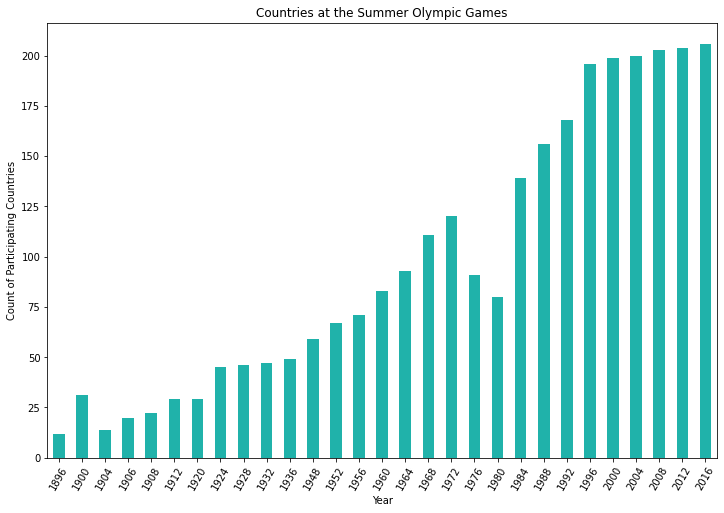

In [51]:
plt.figure(figsize=(12,8))
final_df.groupby('Year')['Country'].nunique().plot(kind='bar',color='lightseagreen')
plt.xticks(rotation = 60)
plt.ylabel("Count of Participating Countries")
plt.title("Countries at the Summer Olympic Games")

Assumption is  that the summer Olympic games were bound to be attended by most countries. There was a decline  in participation between 1972 and 1980 where the US and  65 other countries lead by the United States boycotted the 1980 olympics.

## Total participation of Athletes and total participation of Athletes based on Gender

Text(0.5, 1.0, 'Athletes at the Summer Olympic Games by Sex')

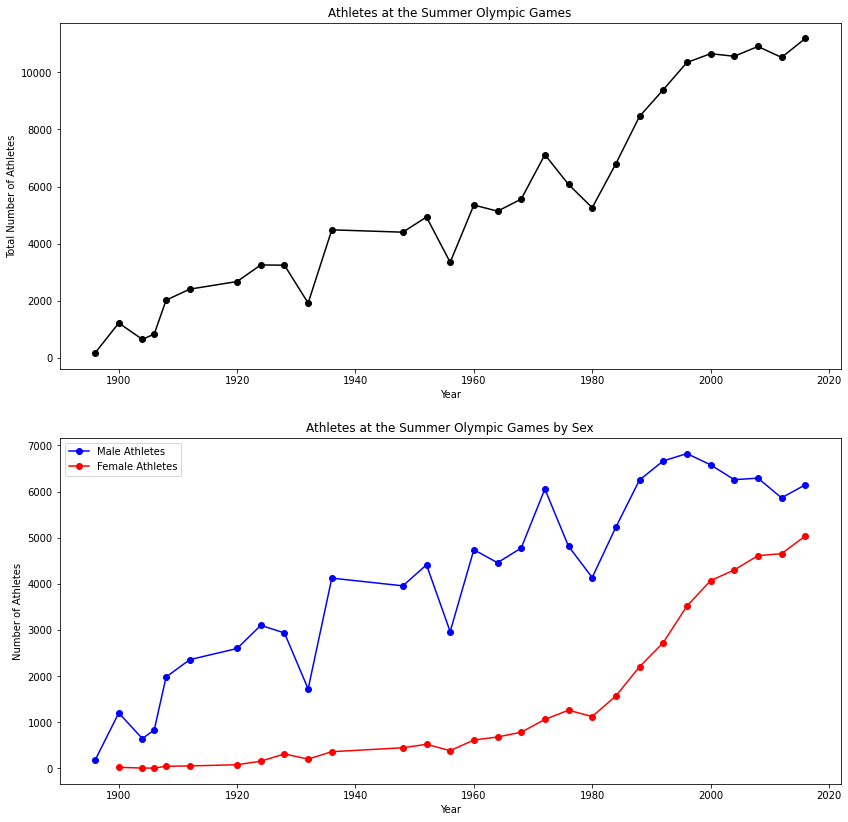

In [52]:
plt.figure(figsize=(14,14))
plt.subplot(2,1,1) #row , column,plot
final_df.groupby('Year')['ID'].nunique().plot(color='k',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Summer Olympic Games")
plt.subplot(2,1,2)
final_df.loc[final_df['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='b',marker='o',label='Male Athletes')
final_df.loc[final_df['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Summer Olympic Games by Sex")

There were  only male participants in 1896. Generally, there  have been fewer female athletes across the years. 

## Host Countries 

Text(0.5, 0, '')

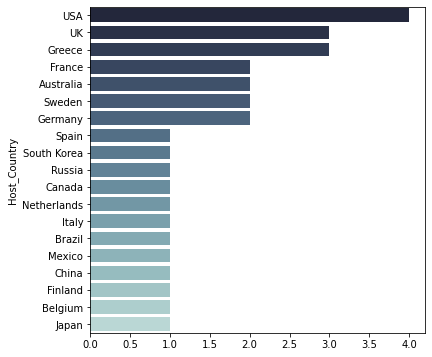

In [54]:
plt.figure(figsize=(6,6))
host_df = final_df[['Year','Host_Country']].drop_duplicates()
sns.countplot(y='Host_Country',data=host_df,order = host_df['Host_Country'].value_counts().index,
              palette=sns.cubehelix_palette(20,start=3,rot=-.25,reverse=True))
plt.xlabel('')

USA has hosted  the event  four times. On the contrary, no African or Middle  Eastern country has  hosted the  event in its 124 year history. 

In [55]:
final_df["Medals1"] = final_df["Medal"].fillna("No Medal")

In [56]:
final_df.head()

ID                                Name Sex   Age  Height  Weight  NOC        Games  Year  Season         City       Sport                         Event      Medal      Country Host_Country      country code_2 code_3  country_code     iso_3166_2 continent       sub_region  region_code  sub_region_code    Medals1
0  1   A Dijiang                           M   24.0  180.0   80.0    CHN  1992 Summer  1992  Summer  Barcelona    Basketball  Basketball Men's Basketball   DidNotWin  China        Spain        China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0             DidNotWin
1  2   A Lamusi                            M   23.0  170.0   60.0    CHN  2012 Summer  2012  Summer  London       Judo        Judo Men's Extra-Lightweight  DidNotWin  China        UK           China        CN     CHN    156.0         ISO 3166-2:CN  Asia      Eastern Asia     142.0        30.0             DidNotWin
2  3   Gunnar Nielsen Aaby                 M   24.0 NaN     NaN      DEN  1920 Summer  1920  Summer  Antwerpen    Football    Football Men's Football       DidNotWin  Denmark      Belgium      Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0            DidNotWin
3  4   Edgar Lindenau Aabye                M   34.0 NaN     NaN      DEN  1900 Summer  1900  Summer  Paris        Tug-Of-War  Tug-Of-War Men's Tug-Of-War   Gold       Denmark      France       Denmark      DK     DNK    208.0         ISO 3166-2:DK  Europe    Northern Europe  150.0        154.0            Gold     
4  8   Cornelia "Cor" Aalten (-Strannood)  F   18.0  168.0  NaN      NED  1932 Summer  1932  Summer  Los Angeles  Athletics   Athletics Women's 100 metres  DidNotWin  Netherlands  USA          Netherlands  NL     NLD    528.0         ISO 3166-2:NL  Europe    Western Europe   150.0        155.0            DidNotWin

In [57]:
#Select part of the dataset where medals were won.
final_df = final_df[final_df["Medals1"] != "DidNotWin"]

In [58]:
len(final_df)

34077

In [59]:
final_df["Medals1"].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

In [60]:
final_df1 = final_df[["NOC","Country","continent","sub_region","Games","Year",'Host_Country','City',"Medals1"]]

In [61]:
final_df1.isnull().sum()

NOC             0
Country         0
continent       0
sub_region      6
Games           0
Year            0
Host_Country    0
City            0
Medals1         0
dtype: int64

In [62]:
final_df1[final_df1["sub_region"].isna()] #6 records with missing  subregions 

NOC                      Country continent sub_region        Games  Year Host_Country            City Medals1
2901    IOA  Individual Olympic Athletes  None      NaN        2016 Summer  2016  Brazil       Rio de Janeiro  Gold  
3275    IOA  Individual Olympic Athletes  None      NaN        2016 Summer  2016  Brazil       Rio de Janeiro  Bronze
18333   IOA  Individual Olympic Athletes  None      NaN        1992 Summer  1992  Spain        Barcelona       Bronze
94764   KOS  Kosovo                       Europe    NaN        2016 Summer  2016  Brazil       Rio de Janeiro  Gold  
155446  IOA  Individual Olympic Athletes  None      NaN        1992 Summer  1992  Spain        Barcelona       Bronze
176261  IOA  Individual Olympic Athletes  None      NaN        1992 Summer  1992  Spain        Barcelona       Silver

In [63]:
final_df1.loc[final_df.continent == "None", "sub_region"] = "None" #if  Continent is  None, then subregion is left as None too 
final_df1.loc[final_df.Country == "Kosovo", "sub_region"] = "Southern Europe" #Replace Southern Europe as sub-region for Kosovo

In [64]:
final_df1.head()

NOC  Country continent       sub_region        Games  Year Host_Country       City Medals1
3   DEN  Denmark  Europe    Northern Europe  1900 Summer  1900  France       Paris      Gold  
12  FIN  Finland  Europe    Northern Europe  1920 Summer  1920  Belgium      Antwerpen  Bronze
13  FIN  Finland  Europe    Northern Europe  1920 Summer  1920  Belgium      Antwerpen  Bronze
15  FIN  Finland  Europe    Northern Europe  1948 Summer  1948  UK           London     Bronze
16  FIN  Finland  Europe    Northern Europe  1948 Summer  1948  UK           London     Gold

In [65]:
len(final_df1[final_df1["continent"] =="Africa"])

568

In [66]:
final_df1[(final_df1["Country"] == "Russia") & (final_df1["Year"] == 1980)]

NOC Country continent      sub_region        Games  Year Host_Country    City Medals1
894     URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  
954     URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Bronze
955     URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  
2545    URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  
2572    URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Bronze
...     ...     ...     ...               ...          ...   ...     ...          ...     ...
220077  URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Silver
220190  URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Bronze
220429  URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  
220808  URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  
220952  URS  Russia  Europe    Eastern Europe  1980 Summer  1980  Russia       Moskva  Gold  

[442 rows x 9 columns]

In [67]:
final_df2 = final_df1.copy() #Create a copy of the dataset 

In [68]:
df_tokyo.head() 

Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total
0  United States of America    39          41            33            113    1            
1  People's Republic of China  38          32            18            88     2            
2  Japan                       27          14            17            58     5            
3  Great Britain               22          21            22            65     4            
4  ROC                         20          28            23            71     3

In [69]:
df_tokyo["Year"] = "2020" #Add year column. Will be  used after the merge 

In [71]:
len(df_tokyo["Country"].unique())

93

93 countries  participated in the  2020 Olympics

In [72]:
df_tokyo.head()

Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total  Year
0  United States of America    39          41            33            113    1              2020
1  People's Republic of China  38          32            18            88     2              2020
2  Japan                       27          14            17            58     5              2020
3  Great Britain               22          21            22            65     4              2020
4  ROC                         20          28            23            71     3              2020

In [73]:
#Rename  countries in the 2020 dataset to match the  records  before 2016
df_tokyo["Country"] = df_tokyo["Country"].replace({"Islamic Republic of Iran":"Iran",'United States of America':"USA",'Syrian Arab Republic':'Syria',                                                              
                                                              "Côte d'Ivoire":'Ivory Coast',
                                                              'Republic of Moldova':'Moldova',                                    
                                                              'Republic of Korea':'South Korea',                                                             
                                                              "People's Republic of China":'China'} )

In [74]:
df_tokyo.head()

Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total  Year
0  USA            39          41            33            113    1              2020
1  China          38          32            18            88     2              2020
2  Japan          27          14            17            58     5              2020
3  Great Britain  22          21            22            65     4              2020
4  ROC            20          28            23            71     3              2020

In [75]:
final_df2["Country"].unique ()

array(['Denmark', 'Finland', 'Norway', 'Netherlands', 'France', 'Italy',
       'Spain', 'Azerbaijan', 'Russia', 'Belarus', 'Cameroon', 'USA',
       'Hungary', 'Greece', 'Australia', 'Iran', 'Canada', 'Pakistan',
       'Uzbekistan', 'Tajikistan', 'Ethiopia', 'Switzerland', 'Germany',
       'Sweden', 'South Africa', 'Turkey', 'Bulgaria', 'Egypt', 'UK',
       'Jordan', 'Japan', 'Romania', 'Puerto Rico', 'Mexico', 'Ghana',
       'Morocco', 'New Zealand', 'Argentina', 'Cuba', 'Uruguay', 'Poland',
       'Czech Republic', 'Nigeria', 'Brazil', 'Austria', 'Lithuania',
       'Indonesia', 'Chile', 'Ukraine', 'Uganda', 'Syria', 'Qatar',
       'Kuwait', 'Individual Olympic Athletes', 'Saudi Arabia',
       'United Arab Emirates', 'Croatia', 'Armenia', 'Serbia', 'Niger',
       'India', 'Belgium', 'Algeria', 'Jamaica', 'Trinidad', 'Colombia',
       'Luxembourg', 'Botswana', 'Tunisia', 'South Korea', 'North Korea',
       'China', 'Guyana', 'Israel', 'Kazakhstan', 'Georgia', 'Kenya',
      

In [76]:
df1 = final_df2.groupby(['Country','Year','continent'])['Medals1'].count().reset_index(name="MedalsNumber") #Group by country and year and count the medals 

In [77]:
df1[df1["MedalsNumber"] == max(df1["MedalsNumber"])] 

Country  Year continent  MedalsNumber
938  Russia  1980  Europe    442

Russia had  442 medals in 1980? Coincidentally, the competition was held  in Moscow and US and  65 other countries  did  not participate. This  has to be proven later. 

## Tokyo 2020 
Add the Tokyo 2020 tally.

In [78]:
df_tokyo.head()

Country  Gold Medal  Silver Medal  Bronze Medal  Total  Rank By Total  Year
0  USA            39          41            33            113    1              2020
1  China          38          32            18            88     2              2020
2  Japan          27          14            17            58     5              2020
3  Great Britain  22          21            22            65     4              2020
4  ROC            20          28            23            71     3              2020

In [79]:
df_tokyo2 = df_tokyo[["Country","Year","Total"]]

In [80]:
df_tokyo2.head()

Country  Year  Total
0  USA            2020  113  
1  China          2020  88   
2  Japan          2020  58   
3  Great Britain  2020  65   
4  ROC            2020  71

In [81]:
final_df = df_events_final.merge(df_country_continent,how="left",left_on="Country",right_on = "country")

In [82]:
df_country_continent1 = df_country_continent[["country","continent"]]

In [84]:
df2 = df_tokyo2.merge(df_country_continent1,how="left",left_on="Country",right_on="country")

In [85]:
df2.isnull().sum()

Country      0
Year         0
Total        0
country      6
continent    6
dtype: int64

In [86]:
df2[df2["country"].isna()]

Country  Year  Total country continent
3   Great Britain     2020  65     NaN     NaN     
4   ROC               2020  71     NaN     NaN     
33  Chinese Taipei    2020  12     NaN     NaN     
42  Kosovo            2020  2      NaN     NaN     
48  Hong Kong, China  2020  6      NaN     NaN     
79  North Macedonia   2020  1      NaN     NaN

These countries were initially not  there in the dataset or were renamed. Great Britain instead of  UK. ROC(Russian Olympic Committe) which is  just Russia etc.

In [87]:
df2.loc[df2.Country == "Great Britain", "continent"] = "Europe"
df2.loc[df2.Country == "Kosovo", "continent"] = "Southern Europe"
df2.loc[df2.Country == "ROC", "continent"] = "Europe"
df2.loc[df2.Country == "Chinese Taipei", "continent"] = "Asia"
df2.loc[df2.Country == "Hong Kong, China", "continent"] = "Asia"
df2.loc[df2.Country == "North Macedonia", "continent"] = "Europe"

In [88]:
df2 = df2.drop(["country"],axis=1)

In [89]:
df2.head()

Country  Year  Total continent
0  USA            2020  113    Americas
1  China          2020  88     Asia    
2  Japan          2020  58     Asia    
3  Great Britain  2020  65     Europe  
4  ROC            2020  71     Europe

In [90]:
df2 = df2.rename(columns={"Total":"MedalsNumber"})

In [91]:
df2 = df2[["Country","Year","continent","MedalsNumber"]]
df2

Country  Year continent  MedalsNumber
0   USA            2020  Americas  113         
1   China          2020  Asia      88          
2   Japan          2020  Asia      58          
3   Great Britain  2020  Europe    65          
4   ROC            2020  Europe    71          
..  ...             ...     ...    ..          
88  Ghana          2020  Africa    1           
89  Grenada        2020  Americas  1           
90  Kuwait         2020  Asia      1           
91  Moldova        2020  Europe    1           
92  Syria          2020  Asia      1           

[93 rows x 4 columns]

In [92]:
df1.head()

Country  Year continent  MedalsNumber
0  Afghanistan  2008  Asia      1           
1  Afghanistan  2012  Asia      1           
2  Algeria      1984  Africa    2           
3  Algeria      1992  Africa    2           
4  Algeria      1996  Africa    3

In [93]:
#Concatenate  the dataframes 
frames= (df1,df2)
final_df = pd.concat(frames)

In [95]:
final_df.head()

Country  Year continent  MedalsNumber
0  Afghanistan  2008  Asia      1           
1  Afghanistan  2012  Asia      1           
2  Algeria      1984  Africa    2           
3  Algeria      1992  Africa    2           
4  Algeria      1996  Africa    3

In [96]:
final_df[final_df["MedalsNumber"] == max(final_df["MedalsNumber"])]

Country  Year continent  MedalsNumber
938  Russia  1980  Europe    442

In [97]:
final_df_1 = final_df[["Year","Country","MedalsNumber"]]

In [98]:
countries_df = final_df_1.groupby(['Country'])['MedalsNumber'].count().reset_index(name="MedalsNumber")

In [99]:
countries_df.head()

Country  MedalsNumber
0  Afghanistan  2           
1  Algeria      7           
2  Argentina    20          
3  Armenia      6           
4  Australia    30

In [100]:
countries_df.sort_values(by='MedalsNumber', ascending=False)

Country  MedalsNumber
40   France           30          
4    Australia        30          
30   Denmark          29          
131  UK               29          
132  USA              29          
..   ...              ..          
91   North Macedonia  1           
107  Senegal          1           
48   Guatemala        1           
49   Guyana           1           
116  Sudan            1           

[143 rows x 2 columns]

In [101]:
countries_df.sort_values('MedalsNumber')['Country'].head(10)
fig = px.pie(countries_df, values='MedalsNumber', names='Country', title='Medals')
fig.show()

In [102]:
#Interested in a bar chart race so pivoting of  values is needed 
new_df  = final_df_1.pivot(index='Year', columns='Country', values='MedalsNumber')

In [103]:
new_df

Country  Afghanistan  Algeria  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Barbados  Belarus  Belgium  Bermuda  Botswana  Brazil  Bulgaria  Burkina Faso  Burundi  Cameroon  Canada  Chile  China  Chinese Taipei  Colombia  Costa Rica  Croatia  Cuba  Curacao  Cyprus  Czech Republic  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  Eritrea  Estonia  Ethiopia  Fiji  Finland  France  Gabon  Georgia  Germany  Ghana  Great Britain  Greece  Grenada  Guatemala  Guyana  Haiti  Hong Kong, China  Hungary  Iceland  India  Individual Olympic Athletes  Indonesia  Iran  Iraq  Ireland  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  Kenya  Kosovo  Kuwait  Kyrgyzstan  Latvia  Lebanon  Lithuania  Luxembourg  Macedonia  Malaysia  Mauritius  Mexico  Moldova  Monaco  Mongolia  Montenegro  Morocco  Mozambique  Namibia  Netherlands  New Zealand  Niger  Nigeria  North Korea  North Macedonia  Norway  Pakistan  Panama  Paraguay  Peru  Philippines  Poland  Portugal  Puerto Rico  Qatar   ROC  Romania  Russia  San Marino  Saudi Arabia  Senegal  Serbia  Singapore  Slovakia  Slovenia  South Africa  South Korea  Spain  Sri Lanka  Sudan  Suriname  Sweden  Switzerland  Syria  Taiwan  Tajikistan  Tanzania  Thailand  Togo  Tonga  Trinidad  Tunisia  Turkey  Turkmenistan     UK    USA  Uganda  Ukraine  United Arab Emirates  Uruguay  Uzbekistan  Venezuela  Vietnam  Virgin Islands, US  Zambia  Zimbabwe
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1896    NaN          NaN      NaN        NaN       3.0        5.0     NaN         NaN      NaN      NaN       NaN      NaN      NaN      NaN       NaN     NaN       NaN           NaN      NaN       NaN     NaN    NaN    NaN             NaN       NaN         NaN      NaN   NaN      NaN     NaN              6.0     NaN       NaN                 NaN      NaN    NaN      NaN      NaN       NaN   NaN       11.0   NaN    NaN       32.0    NaN    NaN             48.0   NaN      NaN        NaN     NaN    NaN                6.0     NaN      NaN    NaN                          NaN        NaN   NaN   NaN      NaN     NaN    NaN          NaN      NaN    NaN     NaN         NaN    NaN     NaN     NaN         NaN     NaN      NaN        NaN         NaN        NaN       NaN        NaN     NaN      NaN     NaN       NaN         NaN      NaN         NaN      NaN          NaN          NaN    NaN      NaN          NaN              NaN     NaN       NaN     NaN       NaN   NaN          NaN     NaN       NaN          NaN    NaN   NaN      NaN     NaN         NaN           NaN      NaN     NaN        NaN       NaN       NaN           NaN   

In [104]:
filled_df = new_df.fillna(0) #Replace NaNs with 0

In [105]:
filled_df


Country  Afghanistan  Algeria  Argentina  Armenia  Australia  Austria  Azerbaijan  Bahamas  Bahrain  Barbados  Belarus  Belgium  Bermuda  Botswana  Brazil  Bulgaria  Burkina Faso  Burundi  Cameroon  Canada  Chile  China  Chinese Taipei  Colombia  Costa Rica  Croatia  Cuba  Curacao  Cyprus  Czech Republic  Denmark  Djibouti  Dominican Republic  Ecuador  Egypt  Eritrea  Estonia  Ethiopia  Fiji  Finland  France  Gabon  Georgia  Germany  Ghana  Great Britain  Greece  Grenada  Guatemala  Guyana  Haiti  Hong Kong, China  Hungary  Iceland  India  Individual Olympic Athletes  Indonesia  Iran  Iraq  Ireland  Israel  Italy  Ivory Coast  Jamaica  Japan  Jordan  Kazakhstan  Kenya  Kosovo  Kuwait  Kyrgyzstan  Latvia  Lebanon  Lithuania  Luxembourg  Macedonia  Malaysia  Mauritius  Mexico  Moldova  Monaco  Mongolia  Montenegro  Morocco  Mozambique  Namibia  Netherlands  New Zealand  Niger  Nigeria  North Korea  North Macedonia  Norway  Pakistan  Panama  Paraguay  Peru  Philippines  Poland  Portugal  Puerto Rico  Qatar   ROC  Romania  Russia  San Marino  Saudi Arabia  Senegal  Serbia  Singapore  Slovakia  Slovenia  South Africa  South Korea  Spain  Sri Lanka  Sudan  Suriname  Sweden  Switzerland  Syria  Taiwan  Tajikistan  Tanzania  Thailand  Togo  Tonga  Trinidad  Tunisia  Turkey  Turkmenistan     UK    USA  Uganda  Ukraine  United Arab Emirates  Uruguay  Uzbekistan  Venezuela  Vietnam  Virgin Islands, US  Zambia  Zimbabwe
Year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1896     0.0          0.0      0.0        0.0      3.0        5.0      0.0         0.0      0.0      0.0       0.0      0.0      0.0      0.0       0.0     0.0       0.0           0.0      0.0       0.0     0.0    0.0    0.0             0.0       0.0         0.0      0.0   0.0      0.0     0.0             6.0      0.0       0.0                 0.0      0.0    0.0      0.0      0.0       0.0   0.0      11.0    0.0    0.0      32.0     0.0    0.0            48.0    0.0      0.0        0.0     0.0    0.0               6.0      0.0      0.0    0.0                          0.0        0.0   0.0   0.0      0.0     0.0    0.0          0.0      0.0    0.0     0.0         0.0    0.0     0.0     0.0         0.0     0.0      0.0        0.0         0.0        0.0       0.0        0.0     0.0      0.0     0.0       0.0         0.0      0.0         0.0      0.0          0.0          0.0    0.0      0.0          0.0              0.0     0.0       0.0     0.0       0.0   0.0          0.0     0.0       0.0          0.0    0.0   0.0      0.0     0.0         0.0           0.0      0.0     0.0        0.0       0.0       0.0           0.0  

In [106]:
filled_df.columns

Index(['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados',
       ...
       'Uganda', 'Ukraine', 'United Arab Emirates', 'Uruguay', 'Uzbekistan',
       'Venezuela', 'Vietnam', 'Virgin Islands, US', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=143)

In [121]:
# bcr.bar_chart_race(df = new_df, title = "Medals")

In [107]:
bcr.bar_chart_race(df = filled_df, title = "Country Specific Olympic Medals Over Time (1896-2020)",n_bars=20, orientation='h', fixed_order= True, cmap = 'prism')

## What about  countries in Africa?

In [108]:
final_df.head()

Country  Year continent  MedalsNumber
0  Afghanistan  2008  Asia      1           
1  Afghanistan  2012  Asia      1           
2  Algeria      1984  Africa    2           
3  Algeria      1992  Africa    2           
4  Algeria      1996  Africa    3

In [109]:
df_africa = final_df[final_df['continent'] == "Africa"]

In [110]:
len(df_africa)

135

In [111]:
fig = px.pie(df_africa, values='MedalsNumber', names='Country', title='Medals')
fig.show()

In [119]:
df_africa["Year"] = df_africa["Year"].astype(int) 

In [125]:
pd.set_option('display.max_rows', 500)
df_africa[df_africa["Year"] >= 1908].sort_values(by="Year")

Country  Year continent  MedalsNumber
987   South Africa  1908  Africa    2           
988   South Africa  1912  Africa    7           
989   South Africa  1920  Africa    21          
990   South Africa  1924  Africa    3           
991   South Africa  1928  Africa    6           
324   Egypt         1928  Africa    4           
992   South Africa  1932  Africa    5           
993   South Africa  1936  Africa    1           
325   Egypt         1936  Africa    5           
994   South Africa  1948  Africa    6           
326   Egypt         1948  Africa    5           
995   South Africa  1952  Africa    14          
327   Egypt         1952  Africa    1           
996   South Africa  1956  Africa    7           
731   Morocco       1960  Africa    1           
344   Ethiopia      1960  Africa    1           
445   Ghana         1960  Africa    1           
997   South Africa  1960  Africa    3           
646   Kenya         1964  Africa    1           
345   Ethiopia      1964  Africa    1           
446   Ghana         1964  Africa    1           
1141  Tunisia       1964  Africa    2           
795   Nigeria       1964  Africa    1           
346   Ethiopia      1968  Africa    2           
647   Kenya         1968  Africa    12          
1222  Uganda        1968  Africa    2           
1142  Tunisia       1968  Africa    2           
178   Cameroon      1968  Africa    1           
347   Ethiopia      1972  Africa    2           
1143  Tunisia       1972  Africa    1           
447   Ghana         1972  Africa    1           
793   Niger         1972  Africa    1           
648   Kenya         1972  Africa    12          
796   Nigeria       1972  Africa    1           
1223  Uganda        1972  Africa    2           
1265  Zimbabwe      1980  Africa    15          
1224  Uganda        1980  Africa    1           
348   Ethiopia      1980  Africa    4           
1117  Tanzania      1980  Africa    2           
649   Kenya         1984  Africa    3           
732   Morocco       1984  Africa    2           
797   Nigeria       1984  Africa    5           
1263  Zambia        1984  Africa    1           
2     Algeria       1984  Africa    2           
179   Cameroon      1984  Africa    1           
328   Egypt         1984  Africa    1           
601   Ivory Coast   1984  Africa    1           
949   Senegal       1988  Africa    1           
650   Kenya         1988  Africa    9           
316   Djibouti      1988  Africa    1           
733   Morocco       1988  Africa    3           
448   Ghana         1992  Africa    20          
998   South Africa  1992  Africa    3           
3     Algeria       1992  Africa    2           
798   Nigeria       1992  Africa    11          
743   Namibia       1992  Africa    2           
734   Morocco       1992  Africa    3           
349   Ethiopia      1992  Africa    3           
651   Kenya         1992  Africa    8           
4     Algeria       1996  Africa    3           
350   Ethiopia      1996  Africa    3           
735   Morocco       1996  Africa    2           
799   Nigeria       1996  Africa    24          
652   Kenya         1996  Africa    8           
999   South Africa  1996  Africa    5           
1264  Zambia        1996  Africa    1           
1225  Uganda        1996  Africa    1           
741   Mozambique    1996  Africa    1           
176   Burundi       1996  Africa    1           
744   Namibia       1996  Africa    2           
1144  Tunisia       1996  Africa    1           
180   Cameroon      2000  Africa    18          
653   Kenya         2000  Africa    7           
800   Nigeria       2000  Africa    8           
742   Mozambique    2000  Africa    1           
1000  South Africa  2000  Africa    5           
736   Morocco       2000  Africa    5           
351   Ethiopia      2000  Africa    8           
5     Algeria       2000  Africa    5           
181   Cameroon      2004  Africa    1           
1266  Zimbabwe      2004  Africa    3     

As per the  below records, South Africa first participated in the competition in 1908 as the first African country to do so. It was followed by Egypt in 1928, then Morocco in 1960 then Kenya and  Ethiopia in 1964 in that order. It is  quite impressive for countries like  Kenya  and Nigeria to accumulate the  number of medals  over time  bearing in mind they started participating  56 years after South Africa. 

In [126]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 2 to 88
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       135 non-null    object
 1   Year          135 non-null    int32 
 2   continent     135 non-null    object
 3   MedalsNumber  135 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 4.7+ KB


In [127]:
df_africa[df_africa["Country"] == "South Africa"]

Country  Year continent  MedalsNumber
987   South Africa  1908  Africa    2           
988   South Africa  1912  Africa    7           
989   South Africa  1920  Africa    21          
990   South Africa  1924  Africa    3           
991   South Africa  1928  Africa    6           
992   South Africa  1932  Africa    5           
993   South Africa  1936  Africa    1           
994   South Africa  1948  Africa    6           
995   South Africa  1952  Africa    14          
996   South Africa  1956  Africa    7           
997   South Africa  1960  Africa    3           
998   South Africa  1992  Africa    3           
999   South Africa  1996  Africa    5           
1000  South Africa  2000  Africa    5           
1001  South Africa  2004  Africa    10          
1002  South Africa  2008  Africa    1           
1003  South Africa  2012  Africa    9           
1004  South Africa  2016  Africa    23          
51    South Africa  2020  Africa    3

In [128]:
df_africa[df_africa["Country"] == "Kenya"]

Country  Year continent  MedalsNumber
646  Kenya   1964  Africa    1           
647  Kenya   1968  Africa    12          
648  Kenya   1972  Africa    12          
649  Kenya   1984  Africa    3           
650  Kenya   1988  Africa    9           
651  Kenya   1992  Africa    8           
652  Kenya   1996  Africa    8           
653  Kenya   2000  Africa    7           
654  Kenya   2004  Africa    7           
655  Kenya   2008  Africa    15          
656  Kenya   2012  Africa    11          
657  Kenya   2016  Africa    13          
18   Kenya   2020  Africa    10

In [129]:
df_africa_pivoted  = df_africa.pivot(index='Year', columns='Country', values='MedalsNumber')

In [130]:
df_africa_pivoted

Country  Algeria  Botswana  Burkina Faso  Burundi  Cameroon  Djibouti  Egypt  Eritrea  Ethiopia  Gabon  Ghana  Ivory Coast  Kenya  Mauritius  Morocco  Mozambique  Namibia  Niger  Nigeria  Senegal  South Africa  Sudan  Tanzania  Togo  Tunisia  Uganda  Zambia  Zimbabwe
Year                                                                                                                                                                                                                                                                       
1908    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       2.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1912    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       7.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1920    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       21.0         NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1924    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       3.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1928    NaN      NaN       NaN           NaN      NaN       NaN        4.0   NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       6.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1932    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       5.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1936    NaN      NaN       NaN           NaN      NaN       NaN        5.0   NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       1.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1948    NaN      NaN       NaN           NaN      NaN       NaN        5.0   NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       6.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1952    NaN      NaN       NaN           NaN      NaN       NaN        1.0   NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       14.0         NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1956    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN      NaN       NaN    NaN    NaN          NaN    NaN        NaN      NaN         NaN      NaN    NaN      NaN       7.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1960    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN       1.0      NaN     1.0   NaN          NaN    NaN         1.0     NaN         NaN      NaN    NaN      NaN       3.0          NaN    NaN       NaN   NaN      NaN     NaN     NaN      
1964    NaN      NaN       NaN           NaN      NaN       NaN       NaN    NaN       1.0      NaN     1.0   NaN           1.0   NaN        NaN      NaN         NaN      NaN     1.0     NaN      NaN           NaN    NaN       NaN    2.0     NaN     NaN     NaN      
1968    NaN      NaN       NaN           NaN       1.0      NaN       NaN    NaN       2.0      NaN    NaN    NaN           12.0  NaN        NaN      NaN         NaN      NaN    NaN      NaN      NaN           NaN    NaN       NaN    2.0      2.0  

In [131]:
df_africa_pivoted = df_africa_pivoted.fillna(0) #Fill nulls

In [132]:
df_africa_pivoted.head() 

Country  Algeria  Botswana  Burkina Faso  Burundi  Cameroon  Djibouti  Egypt  Eritrea  Ethiopia  Gabon  Ghana  Ivory Coast  Kenya  Mauritius  Morocco  Mozambique  Namibia  Niger  Nigeria  Senegal  South Africa  Sudan  Tanzania  Togo  Tunisia  Uganda  Zambia  Zimbabwe
Year                                                                                                                                                                                                                                                                       
1908     0.0      0.0       0.0           0.0      0.0       0.0       0.0    0.0      0.0       0.0    0.0    0.0          0.0    0.0        0.0      0.0         0.0      0.0    0.0      0.0      2.0           0.0    0.0       0.0   0.0      0.0     0.0     0.0     
1912     0.0      0.0       0.0           0.0      0.0       0.0       0.0    0.0      0.0       0.0    0.0    0.0          0.0    0.0        0.0      0.0         0.0      0.0    0.0      0.0      7.0           0.0    0.0       0.0   0.0      0.0     0.0     0.0     
1920     0.0      0.0       0.0           0.0      0.0       0.0       0.0    0.0      0.0       0.0    0.0    0.0          0.0    0.0        0.0      0.0         0.0      0.0    0.0      0.0      21.0          0.0    0.0       0.0   0.0      0.0     0.0     0.0     
1924     0.0      0.0       0.0           0.0      0.0       0.0       0.0    0.0      0.0       0.0    0.0    0.0          0.0    0.0        0.0      0.0         0.0      0.0    0.0      0.0      3.0           0.0    0.0       0.0   0.0      0.0     0.0     0.0     
1928     0.0      0.0       0.0           0.0      0.0       0.0       4.0    0.0      0.0       0.0    0.0    0.0          0.0    0.0        0.0      0.0         0.0      0.0    0.0      0.0      6.0           0.0    0.0       0.0   0.0      0.0     0.0     0.0

In [133]:
# bcr.bar_chart_race(df = df_africa_pivoted, title = "Olympic Medals  by African Countries")

In [134]:
bcr.bar_chart_race(df = df_africa_pivoted, title = "Top 20 African Countries by Olympic Medal Count (1896-2020)",
                   n_bars=20, orientation='h', 
                   fixed_order= True, cmap = 'prism',
                   period_label={'x': .98, 'y': .3, 'ha': 'right', 'va': 'center'},
                   steps_per_period=10,
                   period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Viz by @hermanwandabwa - Total Number of Medals: {v.sum():,.0f}', 
                                          
                                          'ha': 'right', 'size': 8, 'family': 'Courier New'},    
                   bar_size=.95,shared_fontdict=None,scale='linear',fig=None,writer=None,bar_kwargs={'alpha': .7},filter_column_colors=False 
                  )

A lot more analyses would  have been done. However, my main objective was to have a broader picture of the  changes in the medals share by countries over time. I would not have  known that South Africa first participated in the Olympics in 1908. On the other hand Russia seemingly competed  against itself in 1980.  Please feel free to extend  these analysis. 